In [3]:
import sklearn
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print(pd.__version__)
!python --version
print(sklearn.__version__) #1.6.1 em 13.05.2025
#atualizada em 20.09.2024:https://pandas.pydata.org/

2.2.3
Python 3.12.7
1.5.1


In [4]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
#print(mnist.DESCR) # o dataset normalmente fica em cache em $HOME/scikit_learn_data. No meu caso no windows: C:\Users\josen\scikit_learn_data

In [4]:
mnist.keys() #dict python

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)
#X é um dataframe pandas, y é uma serie pandas

(70000, 784)
(70000,)


In [6]:
print(y.value_counts()) # para ver quantas amostras o dataset possui por classe

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


In [6]:
some_digit = X.loc[0,:] #X[0] - será usado mais a frente na predição
# converter de serie pandas para numpy (na verdade já vê a serie como um array)
some_digit_np = some_digit.to_numpy()
some_digit_image = some_digit_np.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

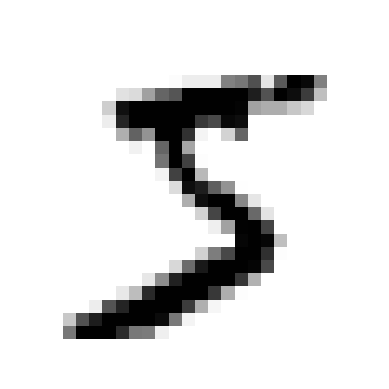

In [22]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [96]:
y[0] #verifica se y[0] é o dígito 5 mesmo

'5'

In [7]:
import numpy as np
# como o label é uma string, vamos converter para número, pois os algoritmos ML trabalham com números
y = y.astype(np.uint8) # unsigned int de 1 byte, o famoso unsigned char do C

In [8]:
# o dataset MNIST já é separado em conjunto de treino e teste, onde o conjunto de treino está embaralhado (shuffle),
# o que é bom neste caso

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
print(y_test.value_counts())

class
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


### Para classificadores binários, vale a pena verificar necessidade de balanceamento e de calibração: https://scikit-learn.org/stable/modules/calibration.html

### Classificação MULTICLASSE OU MULTINOMIAIS (distinguem mais de 2 classes). Estão presentes por exemplo no problema de detecção de objetos com aprendizagem profunda, onde na mesma imagem tem-se objetos de classes distintas (ex. pessoa, carro, semáforo, bicicleta etc.)  e é necessário predizer os rótulos das classes dos objetos presentes. Na outra etapa deve-se também predizer os retângulos demarcadores de cada objeto (bounding box), ou seja, suas 4 coordenadas. Neste caso é um problema de regressão
<img src='img/exemplo_detect.png'>

#### Embora algoritmos como SGD (gradiente descendente estocástico), RandomForest (florestas aleatórias), Naive Bayes entre outros lidem com multiclasse nativamente, outros são estritamente binários, como regressão logística, SVM etc. mas existem técnicas para usar os binários. A primeira técnica é a OvR (one versus-the-rest). No caso do MNIST com 10 classes, é um classificador binário para cada dígito (detector 0, detector 1, detector 2 etc.). Obtém-se o score de decisão de cada classificador binário e o maior score é a classe predita.
#### Já o OvO (One-versus-One) são classificadores binários aos pares (distinguir 0 e 2, 1 e 2 etc.), sendo necessário N x (N-1)/2 classificadores. No caso do MNIST 45 classificadores. A vantagem é ser mais rápido, pois cada um só precisa ser treinado em seu subconjunto.<br>

https://scikit-learn.org/stable/modules/multiclass.html

In [ ]:
#from sklearn.multiclass import One
from sklearn.svm import SVC #SUPPORT VECTOR MACHINE - MÁQUINA DE VETOR DE SUPORTE
svm_model = SVC() #usa OvO
svm_model.fit(X_train, y_train) #todo o conjunto
svm_model.predict([some_digit])


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [24]:
some_digit_scores = svm_model.decision_function([some_digit])
some_digit_scores #10 scores por instância

c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

### Obtendo o índice do maior score

In [25]:
np.argmax(some_digit_scores)

5

In [26]:
svm_model.classes_ #coincidiu com a classe 5!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Vamos forçar a usar a técnica OvR com o SVM

In [1]:
"""from sklearn.multiclass import OneVsRestClassifier
svm_ovr_model = OneVsRestClassifier(SVC()) #passa no construtor o algoritmo classificador, não precisa ser binário
svm_ovr_model.fit(X_train, y_train) #todo o conjunto
svm_ovr_model.predict([some_digit])

print(len(svm_ovr_model.estimators_))"""

'from sklearn.multiclass import OneVsRestClassifier\nsvm_ovr_model = OneVsRestClassifier(SVC()) #passa no construtor o algoritmo classificador, não precisa ser binário\nsvm_ovr_model.fit(X_train, y_train) #todo o conjunto\nsvm_ovr_model.predict([some_digit])\n\nprint(len(svm_ovr_model.estimators_))'

In [9]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier()

# Se usar o SGDClassifier, não roda OvR ou OvO, pode usar direto pois lida com multiclasse
model_sgd.fit(X_train, y_train)
model_sgd.predict([some_digit])

c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [10]:
model_sgd.decision_function([some_digit])

c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-23391.72054095, -33366.16077758, -10486.0662318 ,
            46.20841569, -34005.51876853,   2588.05578379,
        -18713.92286   , -15661.27591857, -13126.77199311,
        -12106.01927163]])

In [ ]:
# avaliando
from sklearn.model_selection import cross_val_score
cross_val_score(model_sgd, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(model_sgd, X_train_scaled, y_train, scoring='accuracy', cv=3, n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

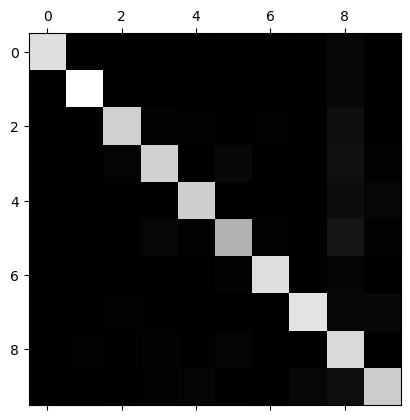

In [ ]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model_sgd, X_train_scaled, y_train, cv=3, n_jobs=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

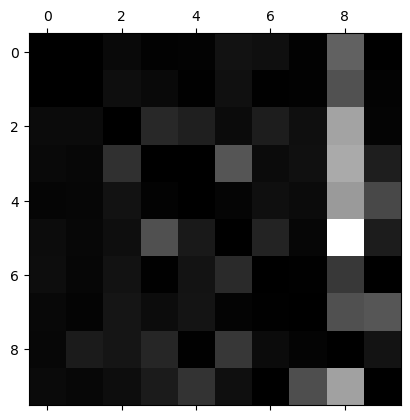

In [45]:
# parece haver confusão do 3 com o 5
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums # dividir cada valor na matriz pelo número de imagens na classe correspondente (ERRO)

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

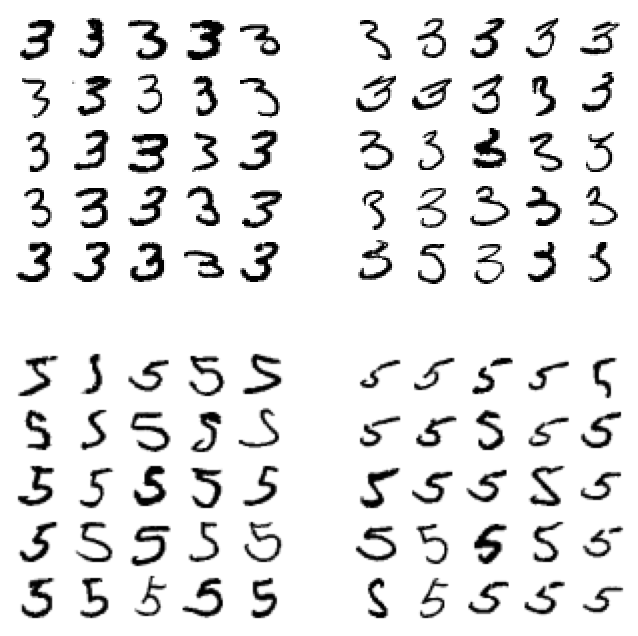

In [48]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# 5x5 à esquerda algarismos classificados como 3 e à direita como 5
# Os erros se devem ao SGD simples, linear, os 3s e 5s diferem só em alguns pixels

# classificador sensível à mudança e à rotação da imagem. Pode-se corrigir para que estejam bem centralizadas, sem muita rotação

#### E por último classificação multirótulo e multioutput (mais de 2 rótulos). Para multirótulo, suponha que queremos gerar a saída de várias classes para cada instância, por exemplo, queremos reconhecer três rostos em uma foto: Pedro, Maria, João. Uma foto com Pedro e João teria como saída [1,0,1]. Neste caso, cada classe é binária, é Pedro ou não é Pedro. Na classificação multioutput esta é uma generalização da multirótulo, e cada rótulo pode ser multi classeado

In [9]:
# Vamos classificar imagens de dígitos maiores ou iguais a 7 e que sejam ímpares
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1) #impar
y_multilabel = np.c_[y_train_large, y_train_odd]

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_multilabel)

model_knn.predict([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [14]:
# Avaliar métrica do classificador. Pode ser qualquer métrica, vamos usar o F1 score por classe
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(model_knn, X_train, y_multilabel, cv=3, n_jobs=-1)

from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average='macro') # ou average='weighted' se as classes são desbalanceadas e ele usa o conjunto suporte para ponderar

0.976410265560605